In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport



Performing the EDA on sales of supermarket company wich is recorded the data in 3 different branches for 3 months.

# Data Dictionary

1 INVOICE ID : Computer generated sales slip invoice identification number

2. BRANCH: Branch of supermarket (3 branches are identified by A,B and C)


3. CITY: Location of supermarkets

4. CUSTOMER TYPE: Type of customers recorded by members for customers using member card and normal for without member card

5. GENDER: Type of customer

6. PRODUCT LINE: General item categorization Groups: Electronic accessories ,Fashion accessories ,Food and beverages, Health and Beauty , Sports and travel 

7.UNIT price : Price of each product in USD

8.TAX: 5% tax fee fro customer buying 

# TASK1: Initial Data Exploration

In [2]:
df = pd.read_csv('supermarket.csv')

In [3]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

# If you want to open perticular number of rows do this one

In [6]:
df.head(10)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   
5  699-14-3026      C  Naypyitaw        Normal    Male   
6  355-53-5943      A     Yangon        Member  Female   
7  315-22-5665      C  Naypyitaw        Normal  Female   
8  665-32-9167      A     Yangon        Member  Female   
9  692-92-5582      B   Mandalay        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   
5  Electronic accessories       85.39         7  29.8865  627.6165  3/25/2019   
6  Electronic accessories       68.84         6  20.6520  433.6920  2/25/2019   
7      Home and lifestyle       73.56        10  36.7800  772.3800  2/24/2019   
8       Health and beauty       36.26         2   3.6260   76.1460  1/10/2019   
9      Food and beverages       54.84         3   8.2260  172.7460  2/20/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3  
5  18:30      Ewallet  597.73                 4.761905       29.8865     4.1  
6  14:36      Ewallet  413.04                 4.761905       20.6520     5.8  
7  11:38      Ewallet  735.60                 4.761905       36.7800     8.0  
8  17:15  Credit card   72.52                 4.761905        3.6260     7.2  
9  13:27  Credit card  164.52                 4.761905        8.2260     5.9

# If we want to see last ten rows

In [7]:
df.tail(10)

Invoice ID Branch       City Customer type  Gender  \
990  886-18-2897      A     Yangon        Normal  Female   
991  602-16-6955      B   Mandalay        Normal  Female   
992  745-74-0715      A     Yangon        Normal    Male   
993  690-01-6631      B   Mandalay        Normal    Male   
994  652-49-6720      C  Naypyitaw        Member  Female   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
990      Food and beverages       56.56         5  14.1400   296.9400   
991       Sports and travel       76.60        10  38.3000   804.3000   
992  Electronic accessories       58.03         2   5.8030   121.8630   
993     Fashion accessories       17.49        10   8.7450   183.6450   
994  Electronic accessories       60.95         1   3.0475    63.9975   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
990  3/22/2019  19:06  Credit card  282.80                 4.761905   
991  1/24/2019  18:10      Ewallet  766.00                 4.761905   
992  3/10/2019  20:46      Ewallet  116.06                 4.761905   
993  2/22/2019  18:35      Ewallet  174.90                 4.761905   
994  2/18/2019  11:40      Ewallet   60.95                 4.761905   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
990       14.1400     4.5  
991       38.3000     6.0  
992        5.8030     8.8  
993        8.7450     6.6  
994        3.0475     5.9  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6

In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Data type of each columns

In [17]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

# #Here we can see thay data coulumn is object data type but it should be type datetime so cange it.

In [11]:
df['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

# #Now you can verify that type of date object has been changed 

# 1. Now set the date column as the Index for the Data frame

In [18]:
df.set_index('Date', inplace=True)

In [19]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69         7  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28         5   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33         7  16.2155  340.5255   
2019-01-27       Health and beauty       58.22         8  23.2880  489.0480   
2019-02-08       Sports and travel       86.31         7  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

# 2. Calculate quick summary about some basic statistics by executing this command

In [20]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

# @@Task2: Univariate Analysis

Q1: What does the distribustion of customer ratings looks like? is it skewed?

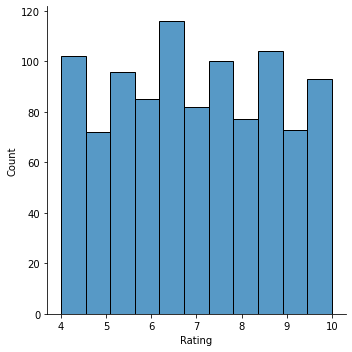

In [24]:
sns.displot(df['Rating'])

/Users/hanookmalapati/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

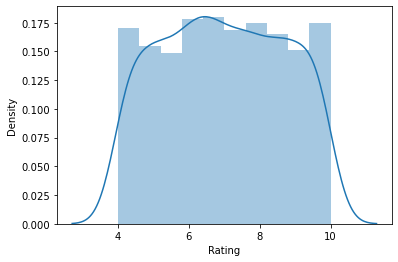

In [25]:
sns.distplot(df['Rating'])

In [37]:
#Plot mean rating, 25 and 75 percentile 

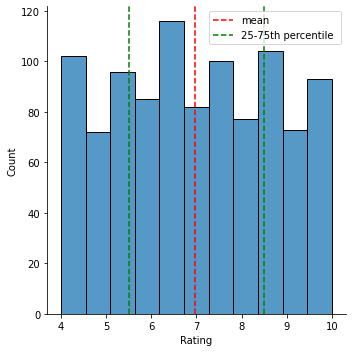

In [33]:
sns.displot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25-75th percentile ')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')
plt.legend()

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

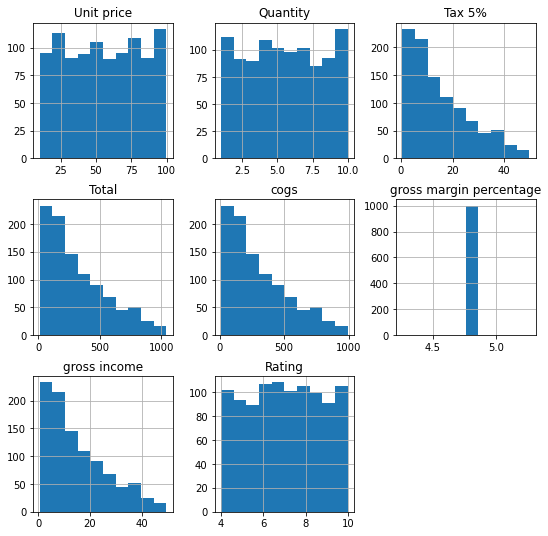

In [35]:
df.hist(figsize=(9,9))

Q2:Do aggregate sales numbers differ by much betweeen branches?

/Users/hanookmalapati/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

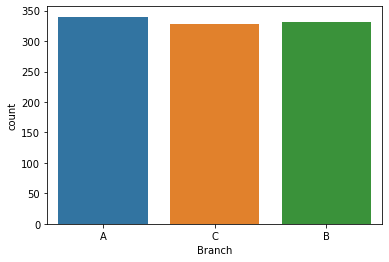

In [38]:
sns.countplot(df['Branch'])

In [39]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

/Users/hanookmalapati/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

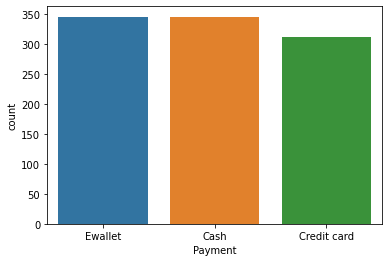

In [53]:
sns.countplot(df['Payment'])

<AxesSubplot:xlabel='Payment', ylabel='count'>

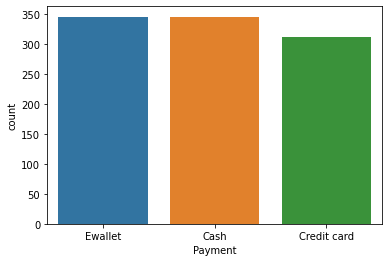

In [51]:
sns.countplot(x=df['Payment'])

# Task3: Bivariate Analysis

Q3: Is there a relationship between gross income and customer ratings?

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

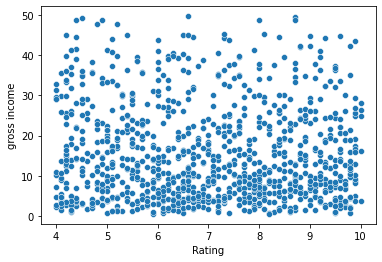

In [55]:
sns.scatterplot(x=df['Rating'],y=df['gross income'])

 @If we want to see the regression plot than exexute this commond

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

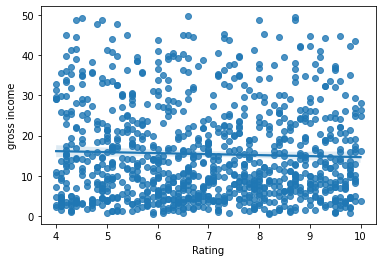

In [57]:
sns.regplot(x=df['Rating'],y=df['gross income'])

@ Want to see the relationship between the branch and gross-income, see the the diffrent brance income shows the different average income

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

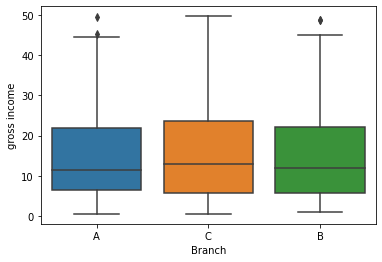

In [58]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

@ See the relationship between gender and grossincome

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

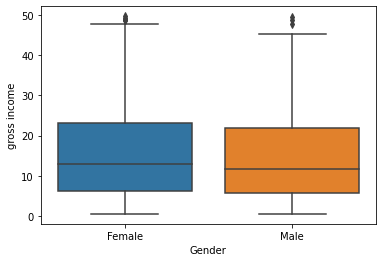

In [60]:
sns.boxplot(x=df['Gender'],y=df['gross income'])

Q4: Is there noticeable time trend in gross income?

@@ Now we can not use the data frame as at per this particular plot, because ae we can see in data column the dates were repeated , because  there can be multiple  customers  at any given date. so we have to aggregate  the data some how.

In [62]:
df.groupby(df.index).mean()

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.750000  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  6.090909  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

In [63]:
df.groupby(df.index).mean().index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

@ Now we can see the x variable is the index wich is the date and these are individual unique days and y variable is the mean grossincome associated with those days.

<AxesSubplot:xlabel='Date', ylabel='gross income'>

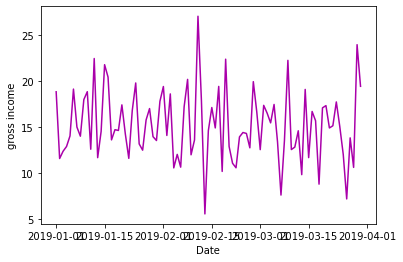

In [74]:
sns.lineplot(x=df.groupby(df.index).mean().index,
             y=df.groupby(df.index).mean()['gross income'],color='#aa00aa')


In [83]:
sns.__version__

'0.11.2'

# Task4: Dealing with duplicate rows and missing values

In [84]:
df.duplicated()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-01-29    False
2019-03-02    False
2019-02-09    False
2019-02-22    False
2019-02-18    False
Length: 1000, dtype: bool

In [85]:
df.duplicated().sum()

0

In [86]:
df[df.duplicated()==True]

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

In [90]:
df.drop_duplicates(inplace=True)

@ If we run the above commands? we can see there will be the none duplicate values

In [91]:
df.isna().sum()/len(df)

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

@ Tere are no values are missing

<AxesSubplot:ylabel='Date'>

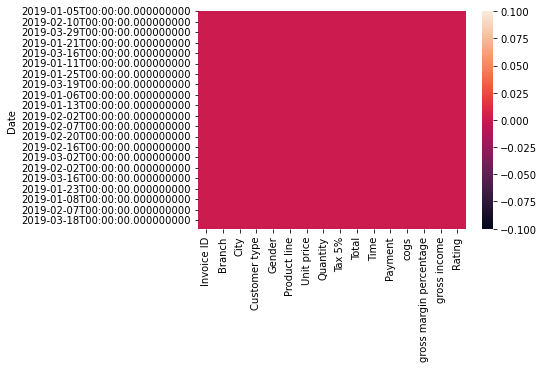

In [93]:
sns.heatmap(df.isnull())

@ We can observe there are no misssing values

<AxesSubplot:ylabel='Date'>

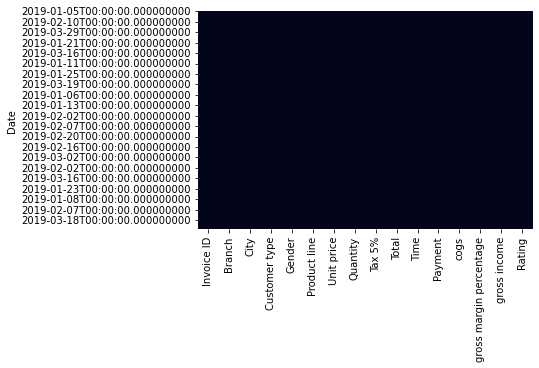

In [100]:
sns.heatmap(df.isnull(),cbar=False)

@ Now we can deal with missing values, we can fill the missing data with zero or we can fill the mean of each column

In [101]:
df.fillna(df.mean(),inplace=True)

/var/folders/y6/z419wl7n5rb6k704ly04g23c0000gp/T/ipykernel_2377/2085774198.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


@ Replacement with mode

In [102]:
df.mode()

Invoice ID Branch    City Customer type  Gender         Product line  \
0    101-17-6199      A  Yangon        Member  Female  Fashion accessories   
1    101-81-4070    NaN     NaN           NaN     NaN                  NaN   
2    102-06-2002    NaN     NaN           NaN     NaN                  NaN   
3    102-77-2261    NaN     NaN           NaN     NaN                  NaN   
4    105-10-6182    NaN     NaN           NaN     NaN                  NaN   
..           ...    ...     ...           ...     ...                  ...   
995  894-41-5205    NaN     NaN           NaN     NaN                  NaN   
996  895-03-6665    NaN     NaN           NaN     NaN                  NaN   
997  895-66-0685    NaN     NaN           NaN     NaN                  NaN   
998  896-34-0956    NaN     NaN           NaN     NaN                  NaN   
999  898-04-2717    NaN     NaN           NaN     NaN                  NaN   

     Unit price  Quantity   Tax 5%     Total   Time  Payment    cogs  \
0         83.77      10.0   4.1540   87.2340  14:42  Ewallet   83.08   
1           NaN       NaN   4.4640   93.7440  19:48      NaN   89.28   
2           NaN       NaN   8.3770  175.9170    NaN      NaN  167.54   
3           NaN       NaN   9.0045  189.0945    NaN      NaN  180.09   
4           NaN       NaN  10.3260  216.8460    NaN      NaN  206.52   
..          ...       ...      ...       ...    ...      ...     ...   
995         NaN       NaN      NaN       NaN    NaN      NaN     NaN   
996         NaN       NaN      NaN       NaN    NaN      NaN     NaN   
997         NaN       NaN      NaN       NaN    NaN      NaN     NaN   
998         NaN       NaN      NaN       NaN    NaN      NaN     NaN   
999         NaN       NaN      NaN       NaN    NaN      NaN     NaN   

     gross margin percentage  gross income  Rating  
0                   4.761905        4.1540     6.0  
1                        NaN        4.4640     NaN  
2                        NaN        8.3770     NaN  
3                        NaN        9.0045     NaN  
4                        NaN       10.3260     NaN  
..                       ...           ...     ...  
995                      NaN           NaN     NaN  
996                      NaN           NaN     NaN  
997                      NaN           NaN     NaN  
998                      NaN           NaN     NaN  
999                      NaN           NaN     NaN  

[1000 rows x 16 columns]

In [103]:
df.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Member
Gender                                  Female
Product line               Fashion accessories
Unit price                               83.77
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [105]:
df.fillna(df.mode().iloc[0],inplace=True)

@ After this command we can see there is no misssing values

In [109]:
dataset = pd.read_csv('supermarket.csv')
prof = ProfileReport(dataset)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Task5: Correlation Analysis

@ When you want to know correlation between any two columns than we can use numpy

In [111]:
np.corrcoef(df['gross income'],df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [116]:
np.corrcoef((df['gross income'],df['Rating'])[1][0])

nan

In [117]:
df.corr()

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Total                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633962 -0.008778  
Quantity                                     NaN      0.705510 -0.015815  
Tax 5%                                       NaN      1.000000 -0.036442  
Total                                        NaN      1.000000 -0.036442  
cogs                                         NaN      1.000000 -0.036442  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.036442  
Rating                                       NaN     -0.036442  1.000000

In [118]:
round(np.corrcoef(df['gross income'],df['Rating'])[1][0])

0

In [119]:
np.round(df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.71   0.71  0.71   
Tax 5%                         0.63      0.71    1.00   1.00  1.00   
Total                          0.63      0.71    1.00   1.00  1.00   
cogs                           0.63      0.71    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.71    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.71   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<AxesSubplot:>

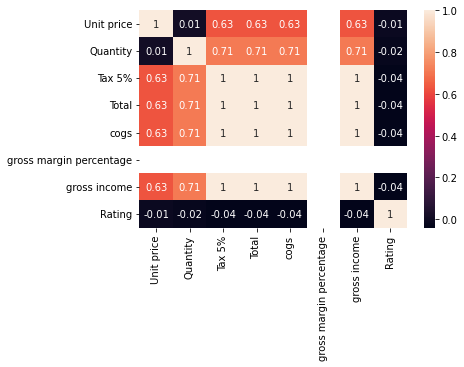

In [121]:
sns.heatmap(np.round(df.corr(),2),annot=True)